<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Preface
</div>

- Churn is a one of the biggest problem in the telecom industry.

- For Telco companies it is key to attract new customers and at the same time avoid contract terminations to grow their revenue-generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example, better price offers more interesting packages, bad service experiences, or changes in customers’ personal situations.

- Telcos apply machine learning models to predict churn on an individual customer basis and take countermeasures such as discounts, special offers, or other gratifications to keep their customers. A customer churn analysis is a typical classification problem within the domain of supervised learning.

- Churn analytics provides valuable capabilities to predict customer churn and also define the underlying reasons that drive it. The churn metric is mostly shown as the percentage of customers that cancel a product or service within a given period (mostly months).

- I have explored the following classficiation techniques and compared their accuracy and other metrics such as:
        ROC-AUC score
        True Positive Rate and False Positive Rate

What is churn analytics?

- Churn analytics is the process of measuring and understanding the rate at which customers quit the product, site, or service.
- Churn analytics can help you understand how frequently customers churn out of the product and where this tends to occur.
- Help you understand which features and functionality are important for keeping customers in your product.
- Churn analytics is critical for getting a performance overview, identifying improvements and understanding which channels are driving the most value.

- Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our work is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn. The model developed in this work uses machine learning techniques on big data platform and builds a new way of features’ engineering and selection. In order to measure the performance of the model, the Area Under Curve (AUC) standard measure is adopted, and the AUC value obtained is 93.3%. Another main contribution is to use customer social network in the prediction model by extracting Social Network Analysis (SNA) features. The use of SNA enhanced the performance of the model from 84 to 93.3% against AUC standard. The model was prepared and tested through Spark environment by working on a large dataset created by transforming big raw data provided by SyriaTel telecom company. The dataset contained all customers’ information over 9 months, and was used to train, test, and evaluate the system at SyriaTel. The model experimented four algorithms: Decision Tree, Random Forest, Gradient Boosted Machine Tree “GBM” and Extreme Gradient Boosting “XGBOOST”. However, the best results were obtained by applying XGBOOST algorithm. This algorithm was used for classification in this churn predictive model.


### **Import Required Libraries**

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

from sklearn.feature_selection import RFE, RFECV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Display all rows and columns of a dataframe 
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Load Data**

In [170]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [171]:
df.tail(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

### **Dataset Overview**

In [172]:
print(df.shape)
print(df.dtypes)

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


#### **Profile Report**
Using pandas_profiling to have a holistic view of the dataset

Generates profile reports from a pandas DataFrame.

The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [173]:
from ydata_profiling import ProfileReport

In [174]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Exploratory Data Analysis
</div>

In [176]:
# Check datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [177]:
# Convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
df.TotalCharges.dtype

dtype('float64')

#### **Description of Data**

In [178]:
# Get descriptive statistics
df.describe()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count        7043.00 7043.00         7043.00       7043.00
mean            0.16   32.37           64.76       2279.73
std             0.37   24.56           30.09       2266.79
min             0.00    0.00           18.25          0.00
25%             0.00    9.00           35.50        398.55
50%             0.00   29.00           70.35       1394.55
75%             0.00   55.00           89.85       3786.60
max             1.00   72.00          118.75       8684.80

In [179]:
df.describe(include=['object'])

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

In [180]:
# Drop customerID
df = df.drop('customerID', axis=1)

In [181]:
# Plot churn rate distribution
churn_count = df['Churn'].value_counts()

# Create a donut chart 
fig = px.pie(names=churn_count.index, values=churn_count.values, hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title='Distribution of Churn',
    width=600,
    height=400
)

# Show the chart
fig.show()

26.5% customers have churned while 73.5% customers have not churned. This is about a 1:2.77 churn to not churn ratio indicating that for every one customer who churned, there are 2.77 customers who did not churn.

In [182]:
# Calculate churn percentage
churn_percentage = churn_count / len(df) * 100

# Create a bar plot
fig = px.bar(x=churn_count.index, y=churn_count.values, text=churn_percentage.round(2), 
             color=churn_count.index)

# Customize the layout
fig.update_traces(texttemplate='%{text}%',textposition='outside')
fig.update_layout(
    title='Distribution of Churn',
    xaxis_title='Churn',
    yaxis_title='Count',
    width=600,
    height=400,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

# Show the plot
fig.show()

In [183]:
# Group the data by gender and chrurn, and count the number of customers in each group
grouped = df.groupby(['gender', 'Churn']).size().reset_index(name='count')

# Calculate the churn rate for each gender
totals = grouped.groupby('gender')['count'].transform('sum')
grouped['churn_rate'] = grouped['count']/totals

# Create bar chart
fig = px.bar(grouped, x='gender', y='churn_rate', color='Churn', text='count',
             barmode='group',
             hover_data={'count': True, 'churn_rate': ':.2%'},
             labels={'count': 'Count', 'churn_rate': 'Churn Rate'})

# Set the chart title and axis labels
fig.update_layout(
    title='Churn Rate by Gender',
    xaxis_title='Gender',
    width=600,
    height=400
)

# Update the y-axis range and format
fig.update_yaxes(range=[0, 1], tickformat='.0%')

# Display the chart
fig.show()

In [184]:
def plot_churn_rate_by_category(category, df):
    # Group the data by the category and churn, and count the number of customers in each group
    grouped = df.groupby([category, 'Churn']).size().reset_index(name='count')

    # Calculate the churn rate for each category
    totals = grouped.groupby(category)['count'].transform('sum')
    grouped['churn_rate'] = grouped['count'] / totals

    # Create the stacked bar chart
    fig = px.bar(grouped, x=category, y='churn_rate', color='Churn', text='count',
                 barmode='group',
                 hover_data={'count': True, 'churn_rate': ':.2%'},
                 labels={'count': 'Count', 'churn_rate': 'Churn Rate'})

    # Set the chart title and axis labels
    fig.update_layout(
        title=f'Churn Rate by {category}',
        xaxis_title=category,
        yaxis_title='Percent',
        width=600,
        height=400
    )

    # Update the y-axis range and format
    fig.update_yaxes(range=[0, 1], tickformat='.0%')

    # Display the chart
    fig.show()


plot_churn_rate_by_category('PaymentMethod', df)
plot_churn_rate_by_category('Partner', df)
plot_churn_rate_by_category('Dependents', df)
plot_churn_rate_by_category('Contract', df)
plot_churn_rate_by_category('InternetService', df)
plot_churn_rate_by_category('SeniorCitizen', df)
plot_churn_rate_by_category('OnlineSecurity', df)
plot_churn_rate_by_category('StreamingMovies', df)
plot_churn_rate_by_category('StreamingTV', df)

In [185]:
# create histograms of tenure grouped by churn
hist = px.histogram(data_frame=df, x='tenure', color='Churn', nbins=50, barmode='overlay',
                    category_orders={'Churn': ['No', 'Yes']}, opacity=0.7)
hist.update_layout(xaxis_title="Tenure", 
                   yaxis_title="Count", 
                   title="Distribution of Tenure by Churn",
                   width=600,
                   height=400)

In [186]:
grouped = df.groupby(['tenure', 'Churn']).size().reset_index(name='count')

# Calculate the churn rate for each gender
totals = grouped.groupby('tenure')['count'].transform('sum')
grouped['churn_rate'] = grouped['count']/totals

# Create a scatter plot of the churn rate against the tenure
fig = px.line(data_frame=grouped, x='tenure', y='churn_rate', color='Churn')

# Add axis labels and title
fig.update_layout(xaxis_title="Tenure",
                yaxis_title="Churn Rate",
                title="Churn Rate by Tenure",
                width=600,
                height=400)

# Show the plot
fig.show()

In [188]:
# create histograms of tenure and age, grouped by churn
hist = px.histogram(data_frame=df, x='MonthlyCharges', color='Churn', nbins=50, barmode='overlay',
                    category_orders={'Churn': ['No', 'Yes']}, opacity=0.7)
hist.update_layout(xaxis_title="MonthlyCharges", 
                   yaxis_title="Count", 
                   title="Distribution of MonthlyCharges by Churn",
                   width=600,
                   height=400)

In [189]:
# create histograms of tenure and age, grouped by churn
hist = px.histogram(data_frame=df, x='TotalCharges', color='Churn', nbins=50, barmode='overlay',
                    category_orders={'Churn': ['No', 'Yes']}, opacity=0.7)
hist.update_layout(xaxis_title="TotalCharges", 
                   yaxis_title="Count", 
                   title="Distribution of TotalCharges by Churn",
                   width=600,
                   height=400)

In [191]:
# Group the data by gender, partner and churn, and count the number of customers in each group
grouped = df.groupby(['gender', 'Partner', 'Churn']).size().reset_index(name='count')

# Calcualate the churn rate for each gender and partner combination
totals = grouped.groupby(['gender', 'Partner'])['count'].transform('sum')
grouped['churn_rate'] = grouped['count'] / totals

# Create the grouped bar chart
fig = px.bar(grouped, x='Partner', y='churn_rate', color='Churn', text='count',
             barmode='group',
             hover_data={'count': True, 'churn_rate': ':.2%'},
             labels={'Partner': 'Has Partner?', 'count': 'Count', 'churn_rate': 'Churn Rate'},
             facet_col='gender')

# Set the chart title and axis labels
fig.update_layout(
    title='Churn Rate by Gender and Partner Status',
    xaxis_title='Has Partner?',
    yaxis_title='Percent',
    width=800,
    height=400
)

# Update the y-axis range and format
fig.update_yaxes(range=[0, 1], tickformat='.0%')

# Display the chart
fig.show()

In [192]:
def plot_grouped_bar_chart(df, feature1, feature2):
    # Group the data by feature1, feature2, and churn, and count the number of customers in each group
    grouped = df.groupby([feature1, feature2, 'Churn']).size().reset_index(name='count')

    # Calculate the churn rate for each feature1 and feature2 combination
    totals = grouped.groupby([feature1, feature2])['count'].transform('sum')
    grouped['churn_rate'] = grouped['count'] / totals

    # Create the grouped bar chart
    fig = px.bar(grouped, x=feature2, y='churn_rate', color='Churn', text='count',
                barmode='group', color_discrete_sequence=['#636EFA', '#EF553B'],
                hover_data={'count': True, 'churn_rate': ':.2%'},
                labels={feature2: feature2.capitalize(), 'count': 'Count', 'churn_rate': 'Churn Rate'},
                facet_col=feature1)


    # Set the chart title and axis labels
    fig.update_layout(
        title=f'Churn Rate by {feature1.capitalize()} and {feature2.capitalize()}',
        xaxis_title=feature2.capitalize(),
        yaxis_title='Percent',
        width=800,
        height=400
    )

    # Update the y-axis range and format
    fig.update_yaxes(range=[0, 1], tickformat='.0%')

    # Display the chart
    fig.show()

plot_grouped_bar_chart(df, 'Contract', 'PaymentMethod')
plot_grouped_bar_chart(df, 'SeniorCitizen', 'Partner')
plot_grouped_bar_chart(df, 'SeniorCitizen', 'PaymentMethod')
plot_grouped_bar_chart(df, 'InternetService', 'OnlineSecurity')
plot_grouped_bar_chart(df, 'InternetService', 'Contract')
plot_grouped_bar_chart(df, 'PaperlessBilling', 'MultipleLines')
plot_grouped_bar_chart(df, 'TechSupport', 'OnlineSecurity')


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Data Preprocessing
</div>


In [193]:
# Re-load data
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [194]:
# Drop customerID
customer_ids = df['customerID']
df = df.drop('customerID', axis=1)

In [195]:
# Convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

In [196]:
# Encode 'Churn'
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [197]:
# Select features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

#### **Splitting Dataset**

In [198]:
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.18, random_state=42)

In [200]:
# Create function to preprocess data
def preprocess_data(X_train, X_val, X_test, categorical_features, numerical_features):
    """
    Preprocesses the input data using one-hot encoding for categorical features and standardization for numerical features
    Args:
        X_train: training data
        X_val: validation data
        X_test: test data
        categorical_features: list of categorical feaure names
        numerical_feaures: list of numerical feature names

    Returns:
        X_train_processed_df: preprocessed training data
        X_val_processed_df: preprocessed validation data
        X_test_processed_df: preprocessed test data
    """

    preprocessor = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ], remainder='passthrough')

    # Fit and transform the data using preprocessing pipeline
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_val_preprocessed = preprocessor.transform(X_val)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Get the names of the transformed categorical features
    cat_encoder = preprocessor.named_transformers_['onehot']
    cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

    # Combine the transformed categorical and numerical features into a single list of column names
    all_feature_names = list(cat_feature_names) + numerical_features

    # Create DataFrames for the processed training, validation, and test sets
    X_train_processed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
    X_val_processed_df = pd.DataFrame(X_val_preprocessed, columns=all_feature_names)
    X_test_processed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

    return X_train_processed_df, X_val_processed_df, X_test_processed_df

In [201]:
# Define categorical and numerical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Preprocess the data using the preprocessing function
X_train_processed, X_val_processed, X_test_processed = preprocess_data(X_train, X_val, X_test, categorical_features, numerical_features)

#### **Display Linear Correlation**

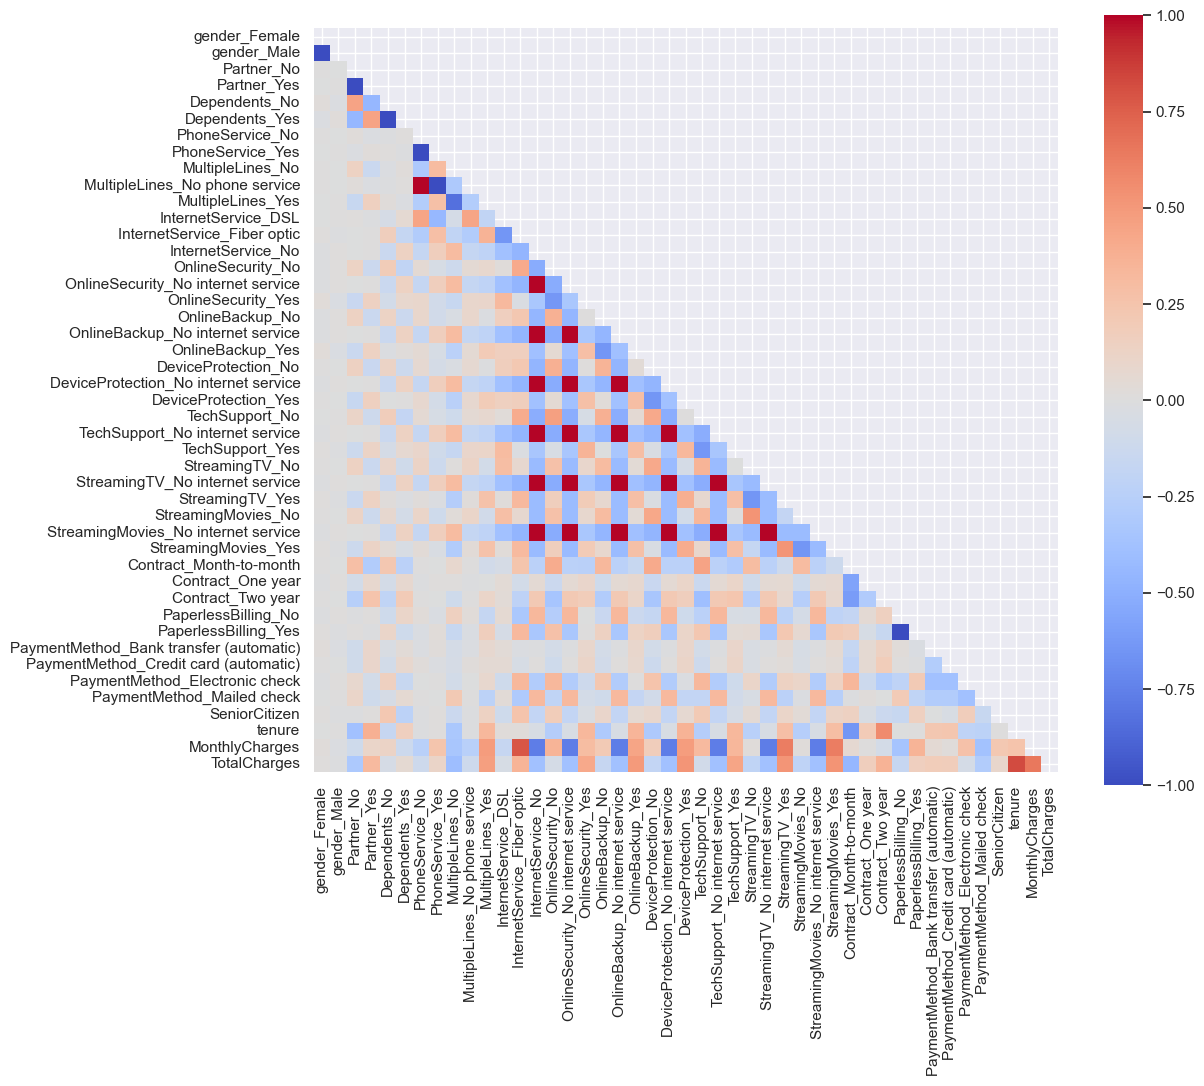

In [202]:
%matplotlib inline
# Check linear correlation (rho) between individual feautures and the target variable
corr = X_train_processed.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='coolwarm', annot=False, vmin=-1, vmax=1)


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Model Training
</div>

We use the LazyPredict library, a useful tool for quickly comparing the performance of various machine learning models on a dataset without manually coding each model. 

In [206]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_processed, X_val_processed, y_train, y_val)
models.sort_values(by='Accuracy', ascending=False)

 97%|█████████▋| 30/31 [00:11<00:00,  2.39it/s]

[LightGBM] [Info] Number of positive: 1313, number of negative: 3595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 4908, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267522 -> initscore=-1.007229
[LightGBM] [Info] Start training from score -1.007229


100%|██████████| 31/31 [00:11<00:00,  2.69it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.81               0.72     0.72      0.80   
SVC                                0.81               0.71     0.71      0.80   
AdaBoostClassifier                 0.80               0.71     0.71      0.80   
CalibratedClassifierCV             0.80               0.71     0.71      0.79   
LinearSVC                          0.80               0.70     0.70      0.79   
NuSVC                              0.80               0.67     0.67      0.78   
RidgeClassifier                    0.80               0.70     0.70      0.79   
RidgeClassifierCV                  0.80               0.69     0.69      0.79   
XGBClassifier                      0.80               0.72     0.72      0.79   
LinearDiscriminantAnalysis         0.79               0.70     0.70      0.79   
LGBMClassifier                     0.79               0.70     0.70      0.78   
BaggingClassifier                  0.79               0.67     0.67      0.77   
RandomForestClassifier             0.78               0.68     0.68      0.77   
SGDClassifier                      0.77               0.65     0.65      0.76   
ExtraTreesClassifier               0.76               0.65     0.65      0.75   
Perceptron                         0.76               0.69     0.69      0.76   
KNeighborsClassifier               0.75               0.69     0.69      0.75   
DummyClassifier                    0.75               0.50     0.50      0.64   
PassiveAggressiveClassifier        0.73               0.70     0.70      0.74   
DecisionTreeClassifier             0.73               0.66     0.66      0.73   
QuadraticDiscriminantAnalysis      0.73               0.55     0.55      0.69   
ExtraTreeClassifier                0.71               0.62     0.62      0.71   
LabelPropagation                   0.71               0.63     0.63      0.71   
LabelSpreading                     0.71               0.63     0.63      0.71   
BernoulliNB                        0.70               0.72     0.72      0.71   
NearestCentroid                    0.69               0.72     0.72      0.71   
GaussianNB                         0.68               0.72     0.72      0.70   

                               Time Taken  
Model                                      
LogisticRegression                   0.05  
SVC                                  0.82  
AdaBoostClassifier                   0.64  
CalibratedClassifierCV               0.23  
LinearSVC                            0.04  
NuSVC                                0.99  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.18  
XGBClassifier                        1.70  
LinearDiscriminantAnalysis           0.21  
LGBMClassifier                       0.40  
BaggingClassifier                    0.24  
RandomForestClassifier               0.50  
SGDClassifier                        0.06  
ExtraTreesClassifier                 0.53  
Perceptron                           0.03  
KNeighborsClassifier                 0.40  
DummyClassifier                      0.02  
PassiveAggressiveClassifier          0.05  
DecisionTreeClassifier               0.05  
QuadraticDiscriminantAnalysis        0.07  
ExtraTreeClassifier                  0.02  
LabelPropagation                     1.91  
LabelSpreading                       2.15  
BernoulliNB                          0.04  
NearestCentroid                      0.04  
GaussianNB                           0.03

In [207]:
# Create dictionary of models from the results produced by LazyClassifier
models = {
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(), 
    "ExtraTreesClassifier": ExtraTreesClassifier(), 
    "LGBMClassifier": LGBMClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(), 
    "RidgeClassifierCV": RidgeClassifierCV(),
    "AdaboostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier()
    
}

In [208]:
# Create list to store model names, accuracy and roc_auc score results
model_names, model_acc_results, model_roc_results = [], [], []

# Loop through dictionary and train models
for name, model in models.items():
    history = model.fit(X_train_processed, y_train)
    preds = history.predict(X_val_processed)
    score = accuracy_score(y_val, preds)
    roc = roc_auc_score(y_val, preds)
    model_acc_results.append(score)
    model_roc_results.append(roc)
    model_names.append(name)

    # Create dataframe and print reults
    df_results = pd.DataFrame([model_names, model_acc_results, model_roc_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0: 'Model', 1: 'Accuracy', 2: 'ROC AUC'}).sort_values(by='Accuracy', ascending=False)

df_results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1313, number of negative: 3595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 4908, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267522 -> initscore=-1.007229
[LightGBM] [Info] Start training from score -1.007229


Model Accuracy ROC AUC
0                      SVC     0.81    0.70
1       LogisticRegression     0.81    0.72
10      AdaboostClassifier     0.80    0.71
9        RidgeClassifierCV     0.80    0.69
11           XGBClassifier     0.80    0.72
6           LGBMClassifier     0.79    0.70
2   RandomForestClassifier     0.78    0.68
5     ExtraTreesClassifier     0.76    0.66
8     KNeighborsClassifier     0.75    0.68
7   DecisionTreeClassifier     0.73    0.65
4              BernoulliNB     0.70    0.72
3               GaussianNB     0.68    0.72

### **Hyperparameter Tuning**

In [209]:
# Create function for Performance Evaluation
def evaluate_performance(model, X, y, dataset_name):
    """
    Evaluates the performance of a given model on the input data
    
    Args:
        model: trained machine learning model
        X: input data
        y: target labels
        dataset_name: name of the dataset

    Returns:
        accuracy: accuracy score
        recall: recall score
        precision: precision score
        f1: F1 score
        roc_auc: roc auc score
    """
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    print("{} Accuracy: {:.4f}".format(dataset_name, accuracy))
    print("{} Recall: {:.4f}".format(dataset_name, recall))
    print("{} Precision: {:.4f}".format(dataset_name, precision))
    print("{} F1 score: {:.4f}".format(dataset_name, f1))
    print("{} ROC AUC score: {:.4f}".format(dataset_name, roc_auc))
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    return accuracy, recall, precision, f1, roc_auc

#### **Support Vector Classifier (SVC)**

In [210]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object with the SVC model and the parameter grid
svc_grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)


# Fit the grid search object to the preprocessed training data
svc_grid_search.fit(X_train_processed, y_train)

# Print the best hyperparamters and the corresponding validation score
print("Best hyperparameters: ", svc_grid_search.best_params_)
print(f"Validation Score: {svc_grid_search.best_score_}")

svc_best_model = SVC(**svc_grid_search.best_params_)
svc_best_model.fit(X_train_processed, y_train)

evaluate_performance(svc_best_model, X_val_processed, y_val, "Validation set")

Best hyperparameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Score: 0.7980862455908702
Validation set Accuracy: 0.8071
Validation set Recall: 0.4781
Validation set Precision: 0.6684
Validation set F1 score: 0.5574
Validation set ROC AUC score: 0.6986
[[739  65]
 [143 131]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       804
           1       0.67      0.48      0.56       274

    accuracy                           0.81      1078
   macro avg       0.75      0.70      0.72      1078
weighted avg       0.79      0.81      0.80      1078



(0.8070500927643784,
 0.4781021897810219,
 0.6683673469387755,
 0.5574468085106383,
 0.6986282093183716)

#### **RidgeClassifierCV**

In [211]:
# Define the range of hyperparameters to search
param_grid = {
    'alphas': [(0.01, 0.1, 1.0), (0.1, 1.0, 10.0), (1.0, 10.0, 100.0)],
    'fit_intercept': [True, False]
}

# Create a RidgeClassifierCV object
rcv = RidgeClassifierCV()

# Create a GridSearchCV object
ridge_grid_search = GridSearchCV(rcv, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
ridge_grid_search.fit(X_train_processed, y_train)

# print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", ridge_grid_search.best_params_)
print("Validation score: ", ridge_grid_search.best_score_)


ridge_model_best = RidgeClassifierCV(**ridge_grid_search.best_params_)
ridge_model_best.fit(X_train_processed, y_train)

# evaluate the performance of the model on the validation and test sets
evaluate_performance(ridge_model_best, X_val_processed, y_val, "Validation set")

Best hyperparameters:  {'alphas': (1.0, 10.0, 100.0), 'fit_intercept': False}
Validation score:  0.7984927471240744
Validation set Accuracy: 0.7968
Validation set Recall: 0.4854
Validation set Precision: 0.6303
Validation set F1 score: 0.5485
Validation set ROC AUC score: 0.6942
[[726  78]
 [141 133]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       804
           1       0.63      0.49      0.55       274

    accuracy                           0.80      1078
   macro avg       0.73      0.69      0.71      1078
weighted avg       0.78      0.80      0.79      1078



(0.7968460111317254,
 0.4854014598540146,
 0.6303317535545023,
 0.5484536082474227,
 0.6941932672404402)

#### **LogisticRegression**

In [212]:
# define parameter grid
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 500, 1000]}

# create Logistic Regression object
lr = LogisticRegression()

# create grid search object
lr_grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, n_jobs=-1)

# fit grid search object to the data
lr_grid_search.fit(X_train_processed, y_train)



# print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", lr_grid_search.best_params_)
print("Validation score: ", lr_grid_search.best_score_)


log_model_best = LogisticRegression(**lr_grid_search.best_params_)
log_model_best.fit(X_train_processed, y_train)

# evaluate the performance of the model on the validation and test sets
evaluate_performance(log_model_best, X_val_processed, y_val, "Validation set")

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
Validation score:  0.8021614338417716
Validation set Accuracy: 0.8052
Validation set Recall: 0.5438
Validation set Precision: 0.6368
Validation set F1 score: 0.5866
Validation set ROC AUC score: 0.7190
[[719  85]
 [125 149]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       804
           1       0.64      0.54      0.59       274

    accuracy                           0.81      1078
   macro avg       0.74      0.72      0.73      1078
weighted avg       0.80      0.81      0.80      1078



(0.8051948051948052,
 0.5437956204379562,
 0.6367521367521367,
 0.5866141732283464,
 0.7190371137015651)

#### **AdaBoostClassifier**

In [214]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), 
                       DecisionTreeClassifier(max_depth=2)]}

ada = AdaBoostClassifier()

ada_grid_search = GridSearchCV(ada, param_grid, cv=5)
ada_grid_search.fit(X_train_processed, y_train)

# print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", ada_grid_search.best_params_)
print("Validation score: ", ada_grid_search.best_score_)


ada_model_best = AdaBoostClassifier(**ada_grid_search.best_params_)
ada_model_best.fit(X_train_processed, y_train)

# evaluate the performance of the model on the validation and test sets
evaluate_performance(ada_model_best, X_val_processed, y_val, "Validation set")

Best hyperparameters:  {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 200}
Validation score:  0.8023653074401407
Validation set Accuracy: 0.8043
Validation set Recall: 0.5255
Validation set Precision: 0.6400
Validation set F1 score: 0.5772
Validation set ROC AUC score: 0.7124
[[723  81]
 [130 144]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       804
           1       0.64      0.53      0.58       274

    accuracy                           0.80      1078
   macro avg       0.74      0.71      0.72      1078
weighted avg       0.79      0.80      0.80      1078



(0.8042671614100185,
 0.5255474452554745,
 0.64,
 0.5771543086172345,
 0.712400588299379)

#### **XGBoostClassifier**

In [215]:
# Define parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 500],
}


# create an XGBoost classifier
xgb_model = XGBClassifier()

# perform grid search to find the best hyperparameters
xgb_grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
xgb_grid_search.fit(X_train_processed, y_train)

# print the best hyperparameters and score
print("Best parameters:", xgb_grid_search.best_params_)
print("Best score:", xgb_grid_search.best_score_)

# train an XGBoost model using the preprocessed data and the best hyperparameters
xgb_model_best = XGBClassifier(**xgb_grid_search.best_params_)
xgb_model_best.fit(X_train_processed, y_train)

# evaluate the performance of the model on the validation and test sets
evaluate_performance(xgb_model_best, X_val_processed, y_val, "Validation set")

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best score: 0.8062384905879739
Validation set Accuracy: 0.8108
Validation set Recall: 0.5401
Validation set Precision: 0.6549
Validation set F1 score: 0.5920
Validation set ROC AUC score: 0.7216
[[726  78]
 [126 148]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       804
           1       0.65      0.54      0.59       274

    accuracy                           0.81      1078
   macro avg       0.75      0.72      0.73      1078
weighted avg       0.80      0.81      0.80      1078



(0.8107606679035251,
 0.5401459854014599,
 0.6548672566371682,
 0.592,
 0.7215655300141628)

#### **Model Interpretation**

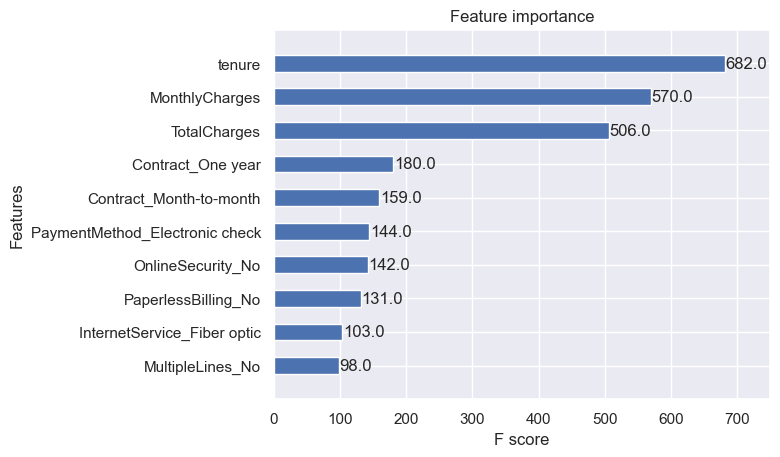

In [216]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
sns.set_style("darkgrid")
plot_importance(xgb_model_best, height=0.5, max_num_features=10)
plt.show()

From our plot_importances results we can see that are top three most important features are MonthlyCharges, tenure, and TotalCharges. Each of the features has an F Score about 3x greater than the 4th ranked feaured Contract_Month-to-Month

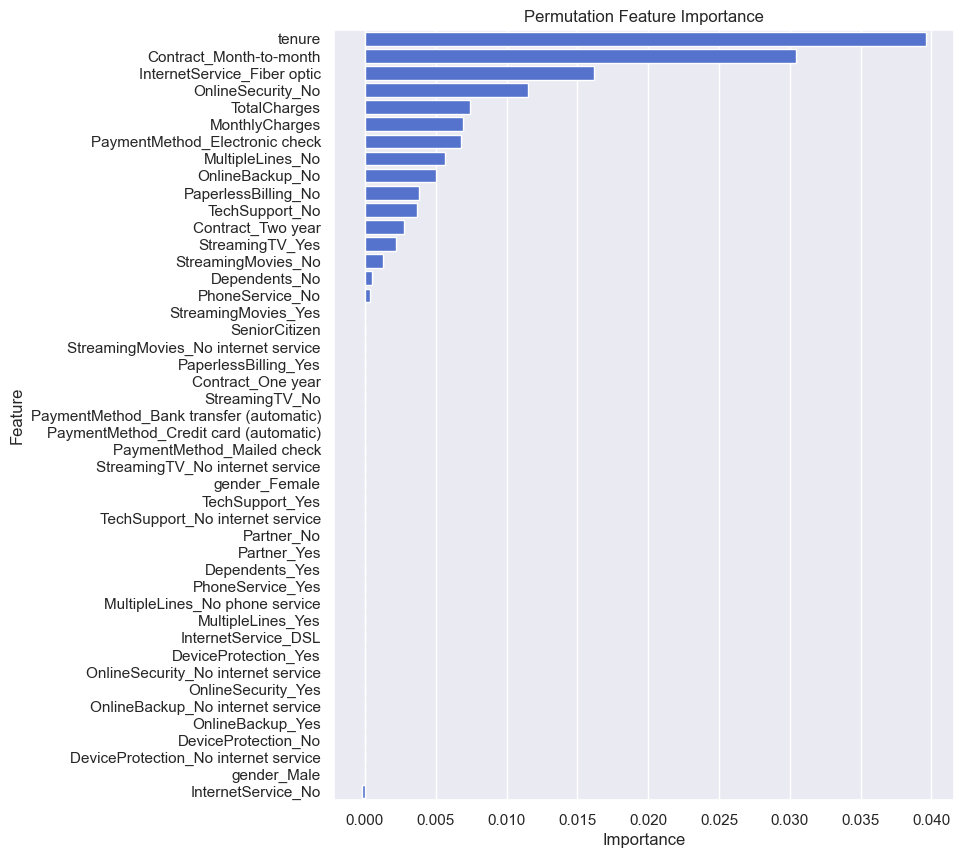

In [217]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
results = permutation_importance(xgb_model_best, X_val_processed, y_val, n_repeats=10, random_state=42)

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': X_val_processed.columns, 'Importance': results.importances_mean})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using seaborn
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', color='royalblue')

# Set the title and axis labels
ax.set_title('Permutation Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [218]:
import lime
import lime.lime_tabular

# create the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_processed.values, feature_names=X_train_processed.columns)

# explain the prediction for the first test instance
exp = explainer.explain_instance(X_test_processed.iloc[0], xgb_model_best.predict_proba)

# print the explanation
print(exp.as_list())

[('0.00 < Contract_Month-to-month <= 1.00', 0.1911981193013709), ('tenure <= -0.96', 0.11582803362252449), ('InternetService_Fiber optic <= 0.00', -0.06949550031035505), ('0.00 < OnlineSecurity_No <= 1.00', 0.05199548101728948), ('0.00 < TechSupport_No <= 1.00', 0.042048176696597946), ('Contract_Two year <= 0.00', 0.03959163730946171), ('MonthlyCharges <= -0.89', -0.03618127741299925), ('TotalCharges <= -0.84', 0.03576248890860434), ('0.00 < PaymentMethod_Electronic check <= 1.00', 0.034592887664298556), ('PaperlessBilling_No <= 0.00', 0.03213944599002983)]


From the Lime results, we can see that the top three most important features for the prediction are Contract_Month-to-month, tenure, and InternetService_Fiber optic. This suggests that customers with a month-to-month contract and a shorter tenure, and those who use fiber optic internet service are more likely to churn. On the other hand, customers with a two-year contract and those who do not use electronic check as their payment method are more likely to stay.

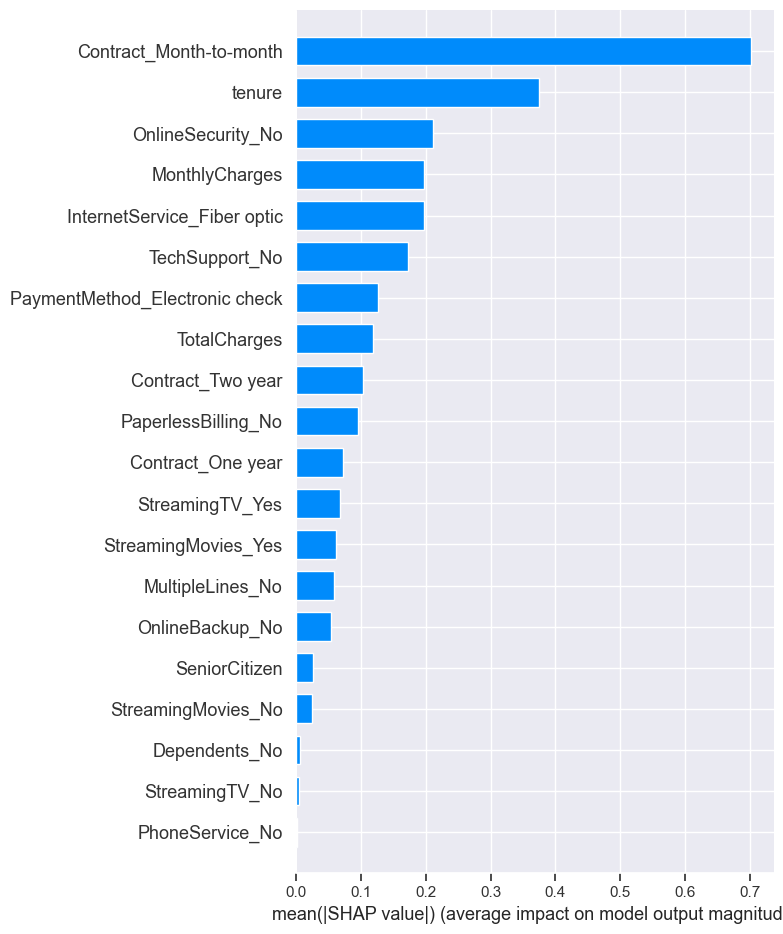

In [219]:
import shap
shap.initjs()

# calculate the SHAP values
explainer = shap.Explainer(xgb_model_best)
shap_values = explainer(X_test_processed)

# plot the SHAP summary plot
shap.summary_plot(shap_values, X_val_processed, plot_type="bar")

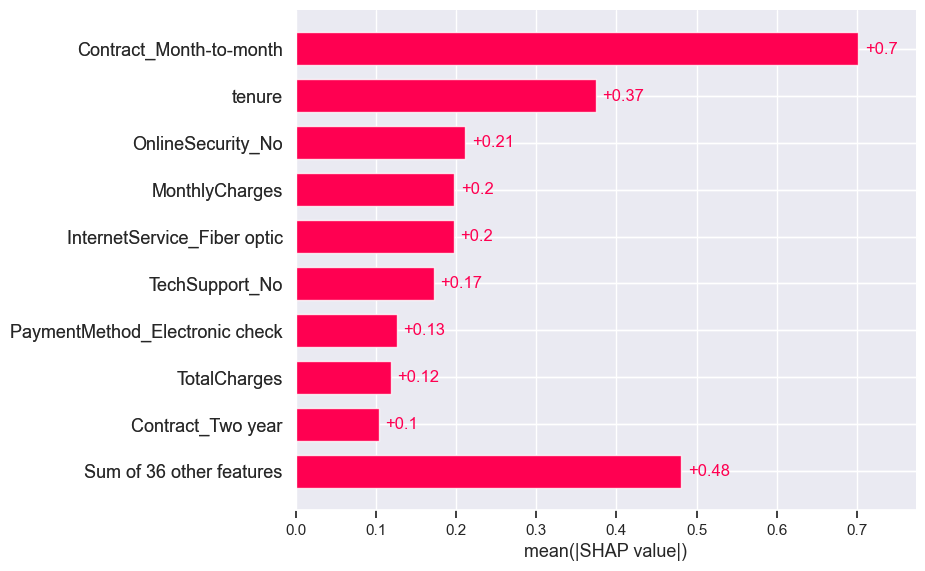

In [220]:
# Mean SHAP
shap.plots.bar(shap_values)

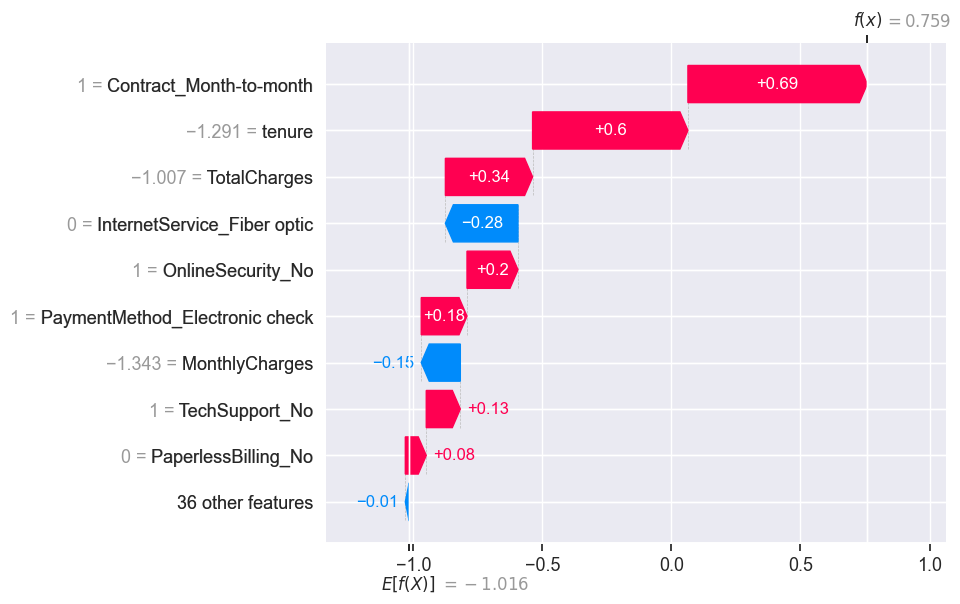

In [221]:
# plot the SHAP values
shap.plots.waterfall(shap_values[0])

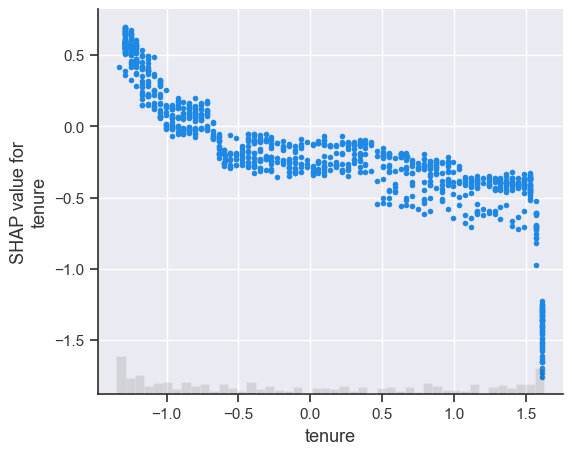

In [222]:
shap.plots.scatter(shap_values[:,"tenure"])

In [223]:
shap.plots.force(shap_values[0:100])

### **Model Evaluation**

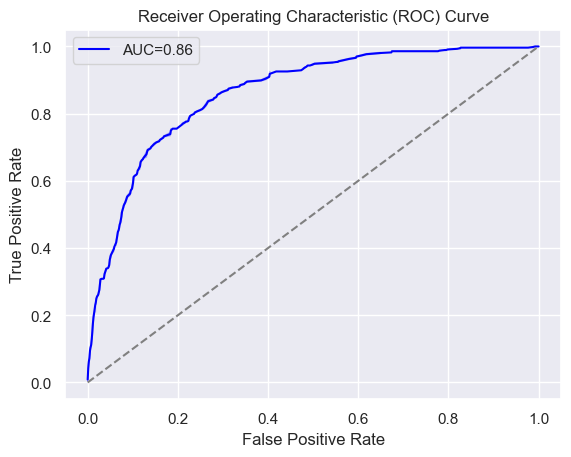

In [224]:
from sklearn.metrics import roc_curve, auc

# get the predicted probabilities of class 1
predicted = xgb_model_best.predict_proba(X_test_processed)[:,1] 

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
sns.set_style("darkgrid")
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
sns.lineplot(data=roc_df, x='fpr', y='tpr', color='blue', label=f'AUC={roc_auc:.2f}')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Text(0.5, 1.0, 'Accuracy Score for XGBoost Classifier: 0.815515610217597')

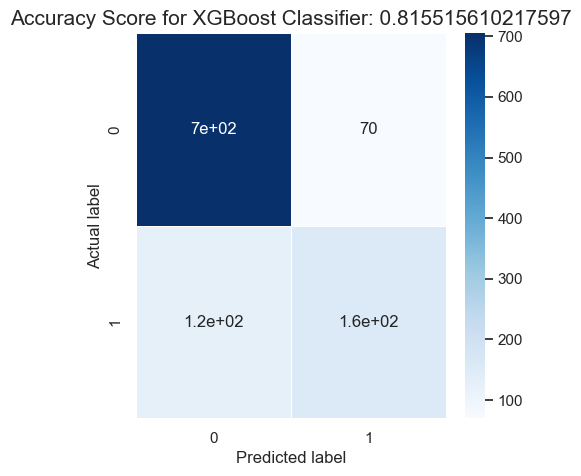

In [225]:
# Display confusion matrix
y_pred = xgb_model_best.predict(X_test_processed)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost Classifier: {0}'.format(xgb_model_best.score(X_test_processed, y_test))
plt.title(all_sample_title, size = 15)

In [226]:
# Print Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       775
           1       0.69      0.56      0.62       282

    accuracy                           0.82      1057
   macro avg       0.77      0.73      0.75      1057
weighted avg       0.81      0.82      0.81      1057



#### **Save best model**

In [227]:
# # Save model object
import joblib
joblib.dump(xgb_model_best, 'best_model.sav')

['best_model.sav']

### **Churn Prediction List**

In [234]:
# Load the Telco Customer Churn dataset
df = pd.read_csv('Data/Telco-Customer-Churn.csv')

# Convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Encode 'Churn'
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Separate the numerical and categorical variables
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_df = df[cat_cols]
num_df = df[num_cols]

# Perform one-hot encoding on the categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
cat_df_enc = pd.DataFrame(encoder.fit_transform(cat_df).toarray(), columns=encoder.get_feature_names_out(cat_cols))

# Standard scale the numerical variables
scaler = StandardScaler()
num_df_sc = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols)

# Concatenate the encoded categorical and scaled numerical dataframes
df_processed = pd.concat([cat_df_enc, num_df_sc, df['Churn']], axis=1)

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(df_processed.drop('Churn', axis=1), df_processed['Churn'], test_size=0.3, random_state=42)

# Sample a portion of the original dataset for test set
test_df = df.sample(frac=0.3, random_state=42)

# Keep a copy of customerID column before dropping it
customerID_test = test_df['customerID']

# Drop customerID column from test set
test_df.drop(['customerID'], axis=1, inplace=True)

# Perform one-hot encoding on the categorical variables
cat_df = test_df[cat_cols]
cat_df_enc = pd.DataFrame(encoder.transform(cat_df).toarray(), columns=encoder.get_feature_names_out(cat_cols))

# Standard scale the numerical variables
num_df = test_df[num_cols]
num_df_sc = pd.DataFrame(scaler.transform(num_df), columns=num_cols)

# Concatenate the encoded categorical and scaled numerical dataframes
X_test = pd.concat([cat_df_enc, num_df_sc], axis=1)

In [235]:
# Define parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 500],
}

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Perform grid search to find the best hyperparameters
xgb_grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
xgb_grid_search.fit(X_train, y_train)


xgb_model_best = XGBClassifier(**xgb_grid_search.best_params_)
xgb_model_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [236]:
evaluate_performance(xgb_model_best, X_val, y_val, "Validation set")

Validation set Accuracy: 0.8003
Validation set Recall: 0.5261
Validation set Precision: 0.6681
Validation set F1 score: 0.5887
Validation set ROC AUC score: 0.7143
[[1389  150]
 [ 272  302]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



(0.8002839564600095,
 0.5261324041811847,
 0.668141592920354,
 0.5886939571150097,
 0.7143332586208068)

In [237]:
# Print the best hyperparameters and score
print("Best parameters:", xgb_grid_search.best_params_)
print("Best score:", xgb_grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best score: 0.8038539553752535


In [238]:
# # Save model object
import joblib
joblib.dump(xgb_model_best, 'churn_list.sav')

['churn_list.sav']

In [239]:
model = joblib.load('churn_list.sav')

# Predict probabilities of churn on test set
y_test_prob = model.predict_proba(X_test)[:, 1]

# Create a new dataframe with customer data and predicted probabilities of churn
results_df = pd.concat([customerID_test.reset_index(drop=True), X_test.reset_index(drop=True), pd.Series(y_test_prob, name='ChurnProb')], axis=1)
results_df.head(10)

customerID  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0  1024-GUALD           1.00         0.00        0.00         1.00   
1  0484-JPBRU           0.00         1.00        1.00         0.00   
2  3620-EHIMZ           1.00         0.00        0.00         1.00   
3  6910-HADCM           1.00         0.00        1.00         0.00   
4  8587-XYZSF           0.00         1.00        1.00         0.00   
5  6818-WOBHJ           1.00         0.00        0.00         1.00   
6  3082-YVEKW           1.00         0.00        0.00         1.00   
7  4737-AQCPU           0.00         1.00        0.00         1.00   
8  4853-RULSV           0.00         1.00        1.00         0.00   
9  5766-ZJYBB           0.00         1.00        1.00         0.00   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0           1.00            0.00             1.00              0.00   
1           1.00            0.00             0.00              1.00   
2           0.00            1.00             0.00              1.00   
3           1.00            0.00             0.00              1.00   
4           1.00            0.00             0.00              1.00   
5           1.00            0.00             0.00              1.00   
6           0.00            1.00             0.00              1.00   
7           0.00            1.00             0.00              1.00   
8           1.00            0.00             0.00              1.00   
9           1.00            0.00             0.00              1.00   

   MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0              0.00                            1.00               0.00   
1              0.00                            0.00               1.00   
2              1.00                            0.00               0.00   
3              1.00                            0.00               0.00   
4              1.00                            0.00               0.00   
5              0.00                            0.00               1.00   
6              0.00                            0.00               1.00   
7              0.00                            0.00               1.00   
8              0.00                            0.00               1.00   
9              1.00                            0.00               0.00   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                 1.00                         0.00                0.00   
1                 0.00                         0.00                1.00   
2                 0.00                         0.00                1.00   
3                 0.00                         1.00                0.00   
4                 1.00                         0.00                0.00   
5                 0.00                         1.00                0.00   
6                 1.00                         0.00                0.00   
7                 1.00                         0.00                0.00   
8                 0.00                         1.00                0.00   
9                 0.00                         0.00                1.00   

   OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0               1.00                                0.00                0.00   
1               0.00                                1.00                0.00   
2               0.00                                1.00                0.00   
3               1.00                                0.00                0.00   
4               1.00                                0.00                0.00   
5               1.00                                0.00                0.00   
6               0.00                                0.00                1.00   
7               0.00                                0.00                1.00   
8               0.00                                0.00                1.00   
9        

In [240]:
results_df[['customerID', 'ChurnProb']].sort_values(by='ChurnProb', ascending=False).head(10)

customerID  ChurnProb
1109  7216-EWTRS       0.95
417   9282-IZGQK       0.94
720   9124-LHCJQ       0.93
680   4910-GMJOT       0.93
1899  2609-IAICY       0.92
1106  9300-AGZNL       0.92
285   5192-EBGOV       0.92
1555  4912-PIGUY       0.91
1888  5299-SJCZT       0.91
936   3068-OMWZA       0.91

In [241]:
top_10_at_risk = results_df[['customerID', 'ChurnProb']].sort_values(by='ChurnProb', ascending=False).head(10)


fig = px.bar(top_10_at_risk.sort_values('ChurnProb'), x='ChurnProb', y='customerID', orientation='h')

fig.update_layout(
    title='Top 10 Customers at Risk of Churn',
    xaxis_title='Churn Probability',
    yaxis_title='Customer ID',
    width=700,
    height=500
)

fig.show()

In [242]:
# # Save the results to a CSV file
results_df.to_csv('Data/results.csv', index=False)